In [ ]:
!pip install yahoofinancials
!pip install yfinance
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yfn
from yahoofinancials import YahooFinancials as YF
import pandas_datareader.data as web

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
hdfc_dt = yfn.download('HDFCBANK.NS',start='2019-02-28',end='2020-02-29',progress=False);
sbi_dt  = yfn.download('SBIN.NS',start='2019-02-28',end='2020-02-29',progress=False);
hdfc_close = hdfc_dt['Close']
hdfc_mavg = hdfc_close.rolling(window=5).mean()



The annualised mean return of stock AAPL is Symbols
AAPL    0.32
dtype: float64, and the annualised volatility is Symbols
AAPL    0.28
dtype: float64
Portfolio expected annualised return is 0.28 and volatility is nan


/usr/local/lib/python3.6/dist-packages/pandas_datareader/base.py:270: SymbolWarning: Failed to read symbol: 'YHOO', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [ ]:
sbi_close = sbi_dt['Close']
sbi_mavg = sbi_close.rolling(window=5).mean()



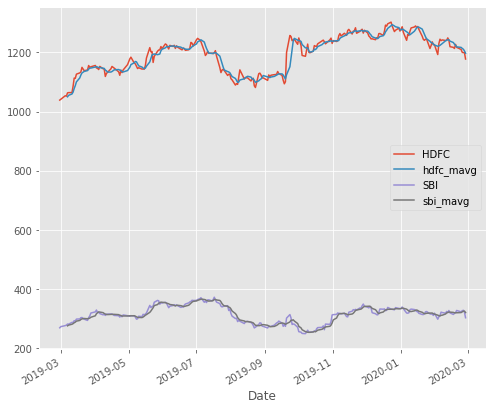

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

hdfc_close.plot(label='HDFC')

hdfc_mavg.plot(label='hdfc_mavg')
sbi_close.plot(label='SBI')

sbi_mavg.plot(label='sbi_mavg')
plt.legend()

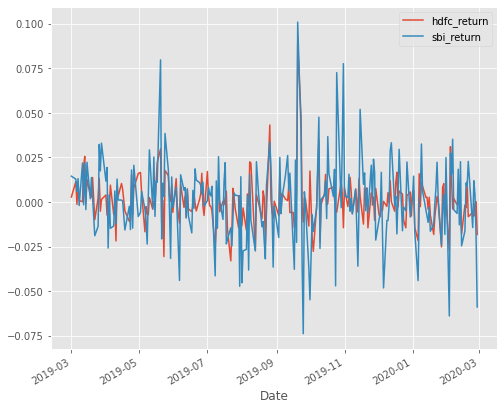

In [ ]:
hdfc_rets = hdfc_close / hdfc_close.shift(1) - 1
hdfc_rets.plot(label='hdfc_return')
sbi_rets = sbi_close / sbi_close.shift(1) - 1
sbi_rets.plot(label='sbi_return')
plt.legend()


In [ ]:
print("mean of hdfc returns :",np.mean(hdfc_rets) )
print("mean of sbi returns :",np.mean(sbi_rets) )

mean of hdfc returns : 0.0006006654055001483
mean of sbi returns : 0.0007504129440540916


In [ ]:
print("variance of hdfc returns :",np.var(hdfc_rets))
print("variance of sbi returns :",np.var(sbi_rets))

variance of hdfc returns : 0.00016621251979755024
variance of sbi returns : 0.0005205000041943352


In [ ]:
print("skewness hdfc_returns : ",hdfc_rets.skew())
print("skewness sbi_returns : ",sbi_rets.skew())


skewness hdfc_returns :  1.5392268583253224
skewness sbi_returns :  0.2924102511309564


In [ ]:
k1 = pd.Series(hdfc_rets)
k2 = pd.Series(sbi_rets)
print("Kurtosis hdfc returns : " , k1.kurtosis() )
print("Kurtosis sbi returns : " , k2.kurtosis() )


Kurtosis hdfc returns :  9.742304693848052
Kurtosis sbi returns :  2.581886157372373


In [ ]:
corr = hdfc_dt['Close'].corr(sbi_dt['Close'])
print("correlation of both the stocks is",corr)

correlation of both the stocks is 0.42581653256569657


Q1. Explain the correlation vs causation involved here?
-Correlation is a relationship between two variables; when one variable changes, the other variable also changes.

Causation is when there is a real-world explanation for why this is logically happening; it implies a cause and effect.

So: causation is correlation with a reason.

IN this case correlation of both stocks are .426(approx.), which show as per previous year data if one's stock is increasing other tends to increase and vise-a-versa. 
Why it is so because both the campanies are from same background marketing that's banking and banking sector stocks are heavily influenced by interest rate risk, counterparty risk and regulatory risk, which affect the whole market. 

Q2. State why we use variance to measure the risk?
# -Variance measures variability from the average or mean. To investors, variability is volatility, and volatility is a measure of risk. Therefore, the variance statistic can help determine the risk an investor assumes when purchasing a specific security.

Q3. Why stock return distribution is not a Normal curve?

-Normal distribution cannot be used to model stock prices because it has a negative side, and stock prices cannot fall below zero.

---


